In [13]:
import numpy as np
import matplotlib.pyplot as plt

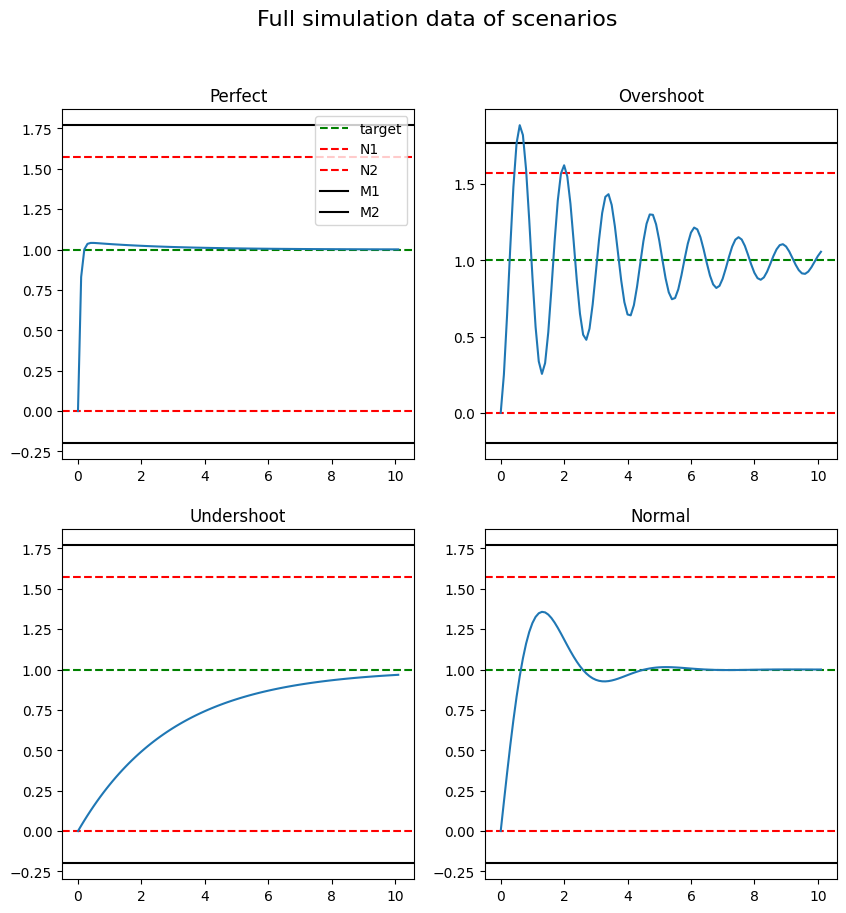

In [14]:
# recreate the 
def scenario(target,Kp, Kd, I, delta, t_stop):
    q = [0]
    t = [0]
    q_vel = 0
    q_vel_hist = [0]
    q_acc_hist = [0]
    e_last = 0
    
    while t[-1] < t_stop:
        e = target - q[-1]
        q_acc = (Kp * e + Kd *(e- e_last) )/ I
        q_vel = q_vel + q_acc * delta
        q.append(q[-1]+q_vel*delta)
        q_vel_hist.append(q_vel)
        q_acc_hist.append(q_acc)
        
        t.append(t[-1]+delta) 
        e_last = e
         
    return t, q, q_vel_hist, q_acc_hist

data1 = scenario( 1,  0.3, 8, 0.1, 0.1, 10)
data2 = scenario( 1,  4, 1, 0.2, 0.1, 10)
data3 = scenario( 1, 0, 1, 0.3, 0.1, 10)
data4 = scenario( 1,  0.3, 1.5, 0.1, 0.1, 10)

fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
for i in (0,1):
    for j in (0,1):
        axs[i,j].axhline(y =1, color="green", label='target', linestyle='dashed')
        axs[i,j].axhline(y =0, color="red", label='N1',linestyle='dashed')
        axs[i,j].axhline(y =1.57, color="red", label='N2', linestyle='dashed')
        axs[i,j].axhline(y =-0.2, color="black", label='M1')
        axs[i,j].axhline(y =1.77, color="black", label='M2')
        
fig.suptitle("Full simulation data of scenarios", fontsize=16)
axs[0,0].set_title("Perfect")
axs[0,0].plot(*data1[0:2])
axs[0,1].set_title("Overshoot")
axs[0,1].plot(*data2[0:2])
axs[1,0].set_title("Undershoot")
axs[1,0].plot(*data3[0:2])
axs[1,1].set_title("Normal")
axs[1,1].plot(*data4[0:2])

axs[0,0].legend()

In [15]:
np.set_printoptions(suppress=True)


stop= 50
step= 5
data = data4
print("t:    ",np.round(data[0][0:stop:step],2))
print("q:    ",np.round(data[1][0:stop:step],2))
print("q_vel:",np.round(data[2][0:stop:step],2))
print("q_acc:",np.round(data[3][0:stop:step],2))

t:     [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
q:     [0.   0.83 1.29 1.34 1.19 1.02 0.94 0.93 0.97 1.  ]
q_vel: [ 0.    1.44  0.55 -0.13 -0.37 -0.28 -0.09  0.04  0.08  0.05]
q_acc: [ 0.   -1.44 -1.79 -1.01 -0.14  0.32  0.36  0.19  0.01 -0.07]
